In [28]:
# -*-coding:utf-8-*-

import matplotlib
# matplotlib.use('agg')
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import os, shutil, glob, re
from collections import Counter
import json, time

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingClassifier, RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.externals import joblib


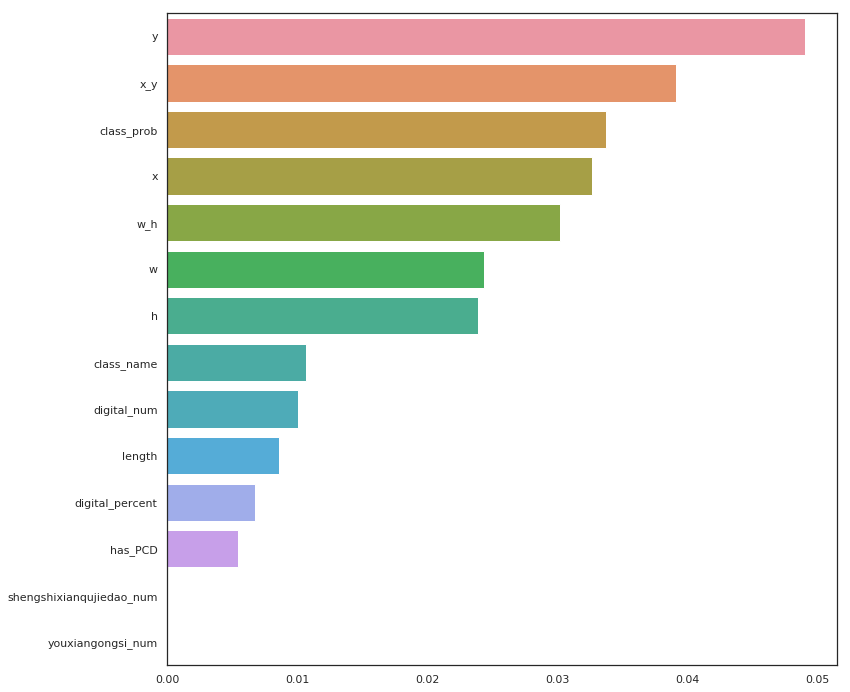

In [32]:
dataset = pd.read_csv('../csv_data/data_163_4.csv')
sns.set(style='white', context='notebook', palette='deep')
xgb_best = joblib.load('./models/GBC_origin_163_4_py3.model', mmap_mode=None)
indices = np.argsort(xgb_best.feature_importances_)[::-1]
fig, ax = plt.subplots(figsize=(12,12))
g = sns.barplot(y=dataset.columns[1:][indices], x=xgb_best.feature_importances_[indices], orient='h', ax=ax)

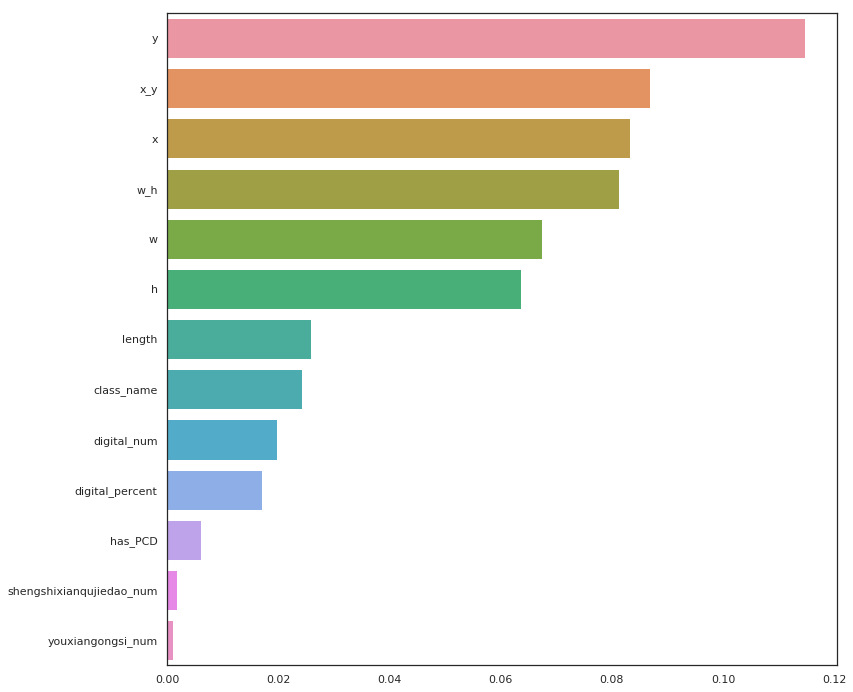

In [37]:
dataset = pd.read_csv('../csv_data/data_163_5.csv')
sns.set(style='white', context='notebook', palette='deep')
xgb_best = joblib.load('./models/GBC_origin_163_5_py3.model', mmap_mode=None)
indices = np.argsort(xgb_best.feature_importances_)[::-1]
fig, ax = plt.subplots(figsize=(12,12))
g = sns.barplot(y=dataset.columns[1:][indices], x=xgb_best.feature_importances_[indices], orient='h', ax=ax)

In [ ]:

g.set_xlabel('Importance')
g.set_ylabel('features')
g.set_title("xgb_best feature importance")

file_name = '../csv_data/data_163.csv'
dataset = pd.read_csv(file_name)
dataset.head()

x = dataset.iloc[:,1:]
y = dataset['category']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.05, random_state=1)
y_pred2 = xgb_best.predict(x_valid)

g = sns.kdeplot(y_pred2, color="Blue", label='prediction',shade= True)
g = sns.kdeplot(y_valid, color="Red", label='test', shade = True)

g.set_xlabel("Score")
g.set_ylabel("Frequency")
g = g.legend()